**Nama : Endah Anisah Fauziyah** <br>
**Kelas : TIF PAgi B** <br>
**Nim : 211351050**

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"endahanisahfauziyah","key":"8d88405ecbaf00882dfdf42150786363"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 89.7MB/s]


In [6]:
!mkdir vehicle-dataset-from-cardekho
!unzip vehicle-dataset-from-cardekho.zip -d vehicle-dataset-from-cardekho
!ls vehicle-dataset-from-cardekho

Archive:  vehicle-dataset-from-cardekho.zip
  inflating: vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv  
  inflating: vehicle-dataset-from-cardekho/Car details v3.csv  
  inflating: vehicle-dataset-from-cardekho/car data.csv  
  inflating: vehicle-dataset-from-cardekho/car details v4.csv  
'car data.csv'	'CAR DETAILS FROM CAR DEKHO.csv'  'Car details v3.csv'	'car details v4.csv'


# Import Library

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [51]:
df = pd.read_csv('vehicle-dataset-from-cardekho/car data.csv')

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Deskripsi Dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<Axes: >

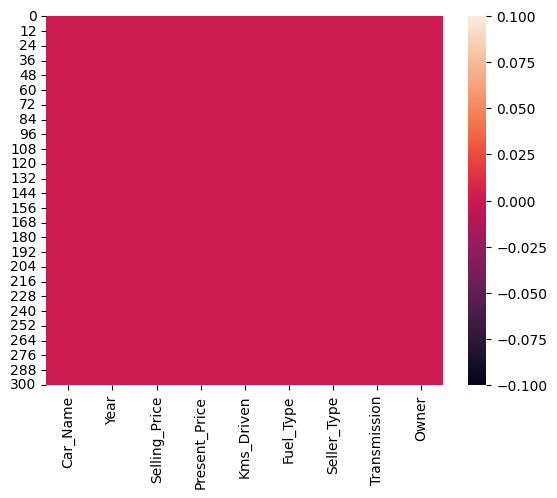

In [55]:
sns.heatmap(df.isnull())

In [56]:
print(df.shape)

(301, 9)


In [57]:
import datetime
date_time = datetime.datetime.now()
print(date_time)
df['Age']=date_time.year - df['Year']

2023-10-30 16:07:18.227240


In [58]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [59]:
unique_Year = df['Year'].unique()

In [60]:
print(unique_Year)

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


# Visualisasi data

In [61]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

<ipython-input-62-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

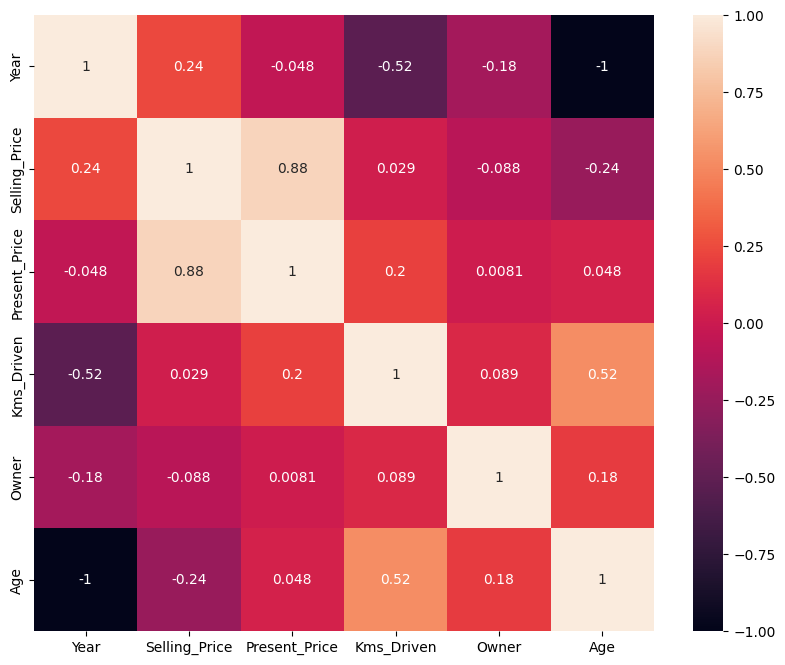

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Mobil Bekas Berdasarkan Jenis Bahan Bakar

---



In [63]:
Fuel_Types = df.groupby('Fuel_Type').count()[['Selling_Price']].sort_values(by='Selling_Price',ascending=True).reset_index()
Fuel_Types = Fuel_Types.rename(columns={'Selling_Price':'car data'})

(array([0, 1, 2]),
 [Text(0, 0, 'CNG'), Text(1, 0, 'Diesel'), Text(2, 0, 'Petrol')])

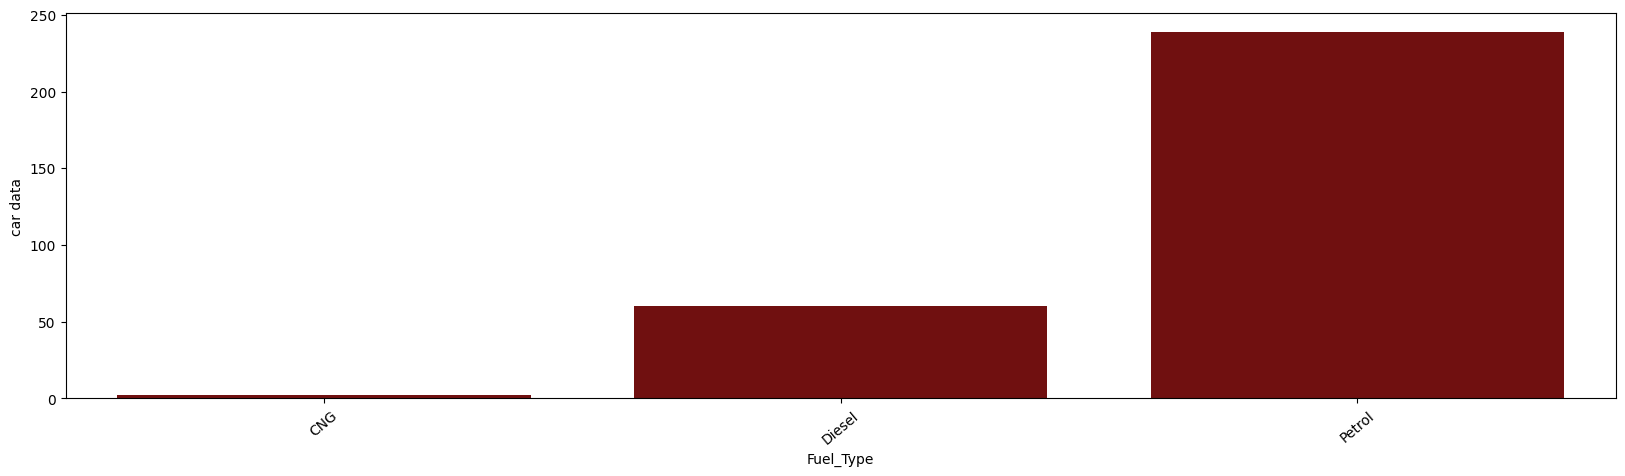

In [64]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=Fuel_Types['Fuel_Type'], y=Fuel_Types['car data'], color='maroon')
plt.xticks(rotation=40)

# Jumlah Mobil Berdasarkan Tahun

In [65]:
Years = df.groupby('Year').count()[['Selling_Price']].sort_values(by='Selling_Price',ascending=True).reset_index()
Years = Years.rename(columns={'Selling_Price':'Count'})

<Axes: xlabel='Year', ylabel='Count'>

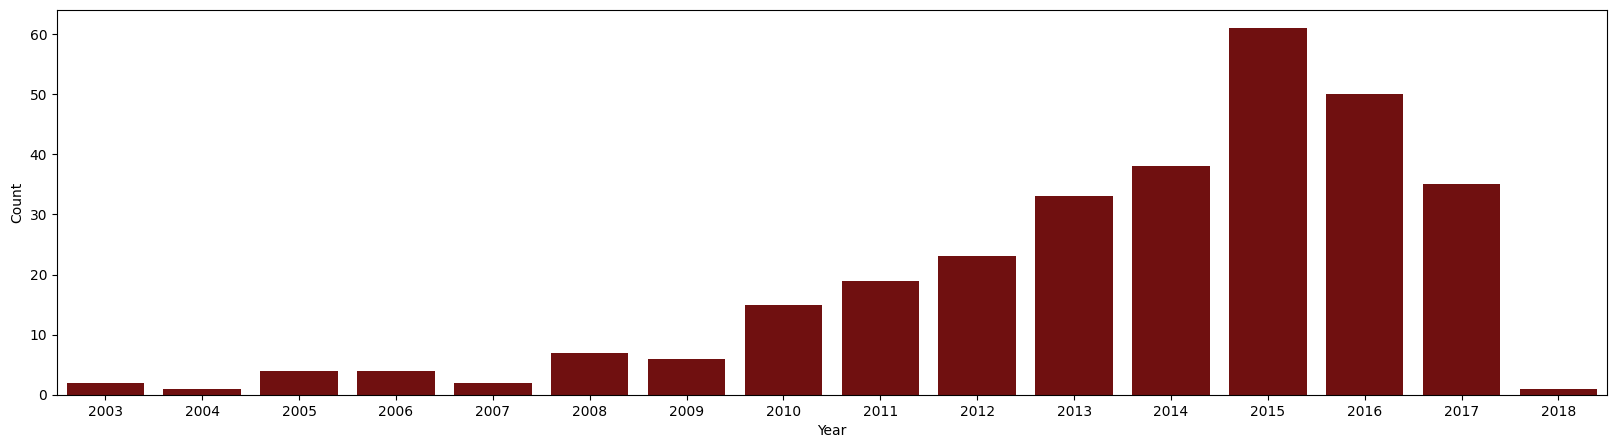

In [66]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=Years['Year'], y=Years['Count'], color='maroon')

# Distribusi Harga Mobil Saat Ini

<ipython-input-67-81b07b1bc01e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'])


<Axes: xlabel='Present_Price', ylabel='Density'>

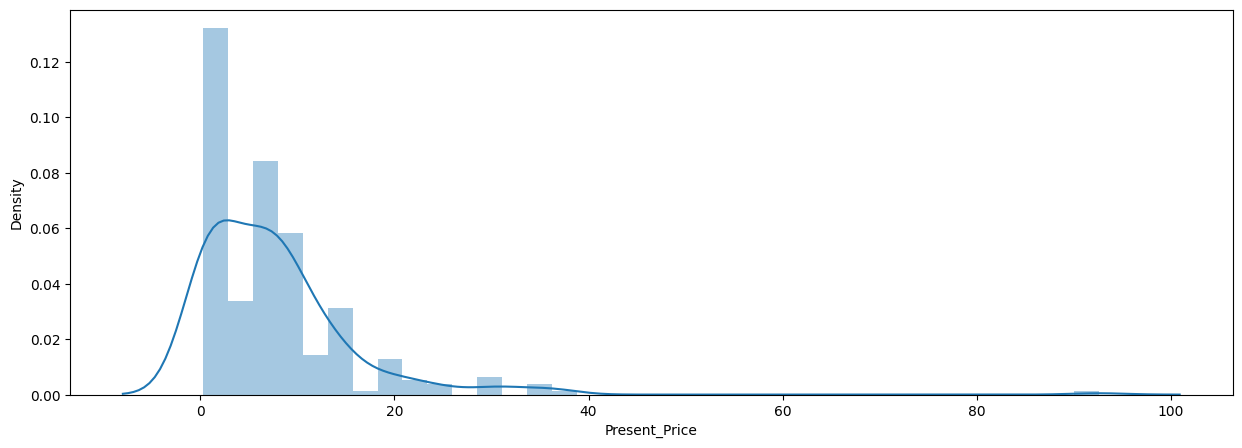

In [67]:
plt.figure(figsize=(15,5))
sns.distplot(df['Present_Price'])

# Distribusi Harga Jual Mobil

<ipython-input-68-0fba294d1ab2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


<Axes: xlabel='Selling_Price', ylabel='Density'>

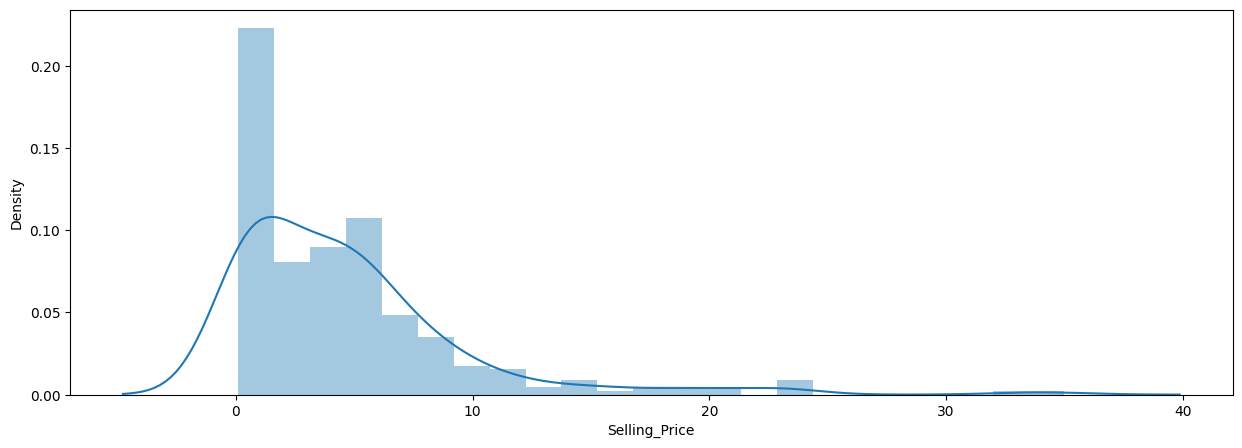

In [68]:
plt.figure(figsize=(15,5))
sns.distplot(df['Selling_Price'])

# Seleksi Fitur

In [69]:
features = ['Year','Present_Price','Owner','Kms_Driven','Age']
x = df[features]
y = df['Selling_Price']
x.shape, y.shape

((301, 5), (301,))

# Split Data Training dan Data Testing

In [70]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(76,)

# Membuat Model Regresi Linier

In [71]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [72]:
score = lr.score(X_test, y_test)
print('akurasi model regresi liniear =', score)

akurasi model regresi liniear = 0.8547189457857935


# Evaluation

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
X = df[['Year','Present_Price','Owner','Kms_Driven','Age']]
y = df['Selling_Price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.122560047934842
R-squared: 0.8210351448080859


# Membuat Inputan Model Regresi Linier

In [33]:
#year=2017, present_price=9.85, owner=0, kms_driven=6900, age=12
input_data = np.array([[2017,9.85,0,6900,12]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [6.06442398]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [87]:
import pickle
filename = 'UTS.sav'
pickle.dump(lr,open(filename,'wb'))